# Lab: Clustering Algorithms with Scikit Learn
<img src="IMG/sk-logo.png" width=200>

* ***SkLearn*** API Reference: https://scikit-learn.org/stable/modules/classes.html
* ***SkLearn*** Clustering Algorithms: https://scikit-learn.org/stable/modules/clustering.html#clustering

In [ ]:
#setup env
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler

In [ ]:
#helper calls
n_samples = 1500
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)

#generating Data Sets A-F
A = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.05)[0]
B = datasets.make_moons(n_samples=n_samples, noise=.05)[0]
C = datasets.make_blobs(n_samples=n_samples, random_state=8)[0]
D = np.random.rand(n_samples, 2)
E = (X_aniso, y)[0]
F = datasets.make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)[0]

## Exercise 1
Plot all raw data sets A-F in one figure.

Hints: use ```scatter``` plots and ```subfigures```.

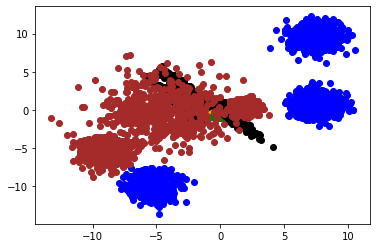

In [3]:
plt.scatter(A[:,0],A[:,1], c="green")
plt.scatter(B[:,0],B[:,1], c="orange")
plt.scatter(C[:,0],C[:,1], c="blue")
plt.scatter(D[:,0],D[:,1], c="red")
plt.scatter(E[:,0],E[:,1], c="black")
plt.scatter(F[:,0],F[:,1], c="brown")


## Exercise 2
Perform ```K-Means``` clustering on all data sets: https://scikit-learn.org/stable/modules/clustering.html#k-means
* 2.1 plot all results
* 2.2 manually try to find the best $k$ for each data set (by visual evaluation)
* 2.3 Use the ```K-Means++``` initialization 

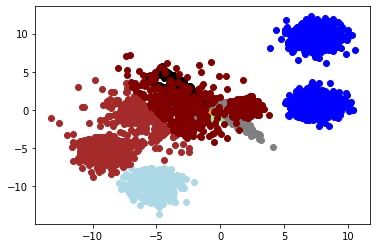

In [4]:
#2.1
kmeans = cluster.KMeans(n_clusters=2, init="random", max_iter=300, tol=1e-04, random_state=0)
kmeans.fit(A)
AK = kmeans.predict(A)
plt.scatter(A[AK == 0,0],A[AK == 0,1], c="green")
plt.scatter(A[AK == 1,0],A[AK == 1,1], c="lightgreen")
kmeans.fit(B)
BK = kmeans.predict(B)
plt.scatter(B[BK == 0,0],B[BK == 0,1], c="orange")
plt.scatter(B[BK == 1,0],B[BK == 1,1], c="yellow")
kmeans.fit(C)
CK = kmeans.predict(C)
plt.scatter(C[CK == 0,0],C[CK == 0,1], c="blue")
plt.scatter(C[CK == 1,0],C[CK == 1,1], c="lightblue")
kmeans.fit(D)
DK = kmeans.predict(D)
plt.scatter(D[DK == 0,0],D[DK == 0,1], c="red")
plt.scatter(D[DK == 1,0],D[DK == 1,1], c="crimson")
kmeans.fit(E)
EK = kmeans.predict(E)
plt.scatter(E[EK == 0,0],E[EK == 0,1], c="black")
plt.scatter(E[EK == 1,0],E[EK == 1,1], c="grey")
kmeans.fit(F)
FK = kmeans.predict(F)
plt.scatter(F[FK == 0,0],F[FK == 0,1], c="brown")
plt.scatter(F[FK == 1,0],F[FK == 1,1], c="maroon")

In [5]:
#2.2
#Optimal number of clusters
# k(A)=3
# k(B)=2
# k(C)=3
# k(D)=3
# k(E)=2
# k(F)=3


In [6]:
#2.3
kmeans = cluster.KMeans(n_clusters=2, init="k-means++", max_iter=300, tol=1e-04, random_state=0)


## Exercise 3
Performs ```DBSCAN``` clustering on all data sets and plot all results: https://scikit-learn.org/stable/modules/clustering.html#dbscan

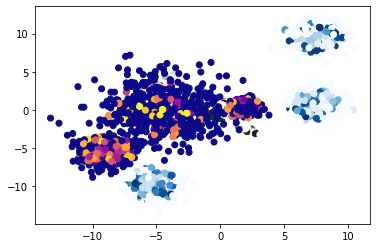

In [29]:
dbscan = cluster.DBSCAN(eps=0.123, min_samples = 2)
ADB = dbscan.fit_predict(A)
plt.scatter(A[:, 0], A[:, 1], c=ADB, cmap="Greens")
BDB = dbscan.fit_predict(B)
plt.scatter(B[:, 0], B[:, 1], c=BDB, cmap="Oranges")
CDB = dbscan.fit_predict(C)
plt.scatter(C[:, 0], C[:, 1], c=CDB, cmap="Blues")
DDB = dbscan.fit_predict(D)
plt.scatter(D[:, 0], D[:, 1], c=DDB, cmap="Reds")
EDB = dbscan.fit_predict(E)
plt.scatter(E[:, 0], E[:, 1], c=EDB, cmap="Greys")
FDB = dbscan.fit_predict(F)
plt.scatter(F[:, 0], F[:, 1], c=FDB, cmap="plasma")

## Exercise 4
Compare the results both clustering methods by the mean ```Silhouette Coefficient``` for each data set.

Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score

In [30]:
from sklearn.metrics import silhouette_score 
print (f'A:K-Means: {silhouette_score(A, AK)}')
print (f'A:DBSCAN: {silhouette_score(A, ADB)}')
print (f'B:K-Means: {silhouette_score(B, BK)}')
print (f'B:DBSCAN: {silhouette_score(B, BDB)}')
print (f'C:K-Means: {silhouette_score(C, CK)}')
print (f'C:DBSCAN: {silhouette_score(C, CDB)}')
print (f'D:K-Means: {silhouette_score(D, DK)}')
#print (f'D:DBSCAN: {silhouette_score(D, DDB)}')
print (f'E:K-Means: {silhouette_score(E, EK)}')
print (f'E:DBSCAN: {silhouette_score(E, EDB)}')
print (f'F:K-Means: {silhouette_score(F, FK)}')
print (f'F:DBSCAN: {silhouette_score(F, FDB)}')

A:K-Means: 0.3535263178902413
A:DBSCAN: 0.02232006498342907
B:K-Means: 0.4894714582980003
B:DBSCAN: 0.3355132136511651
C:K-Means: 0.786262052469124
C:DBSCAN: 0.01242634410363846
D:K-Means: 0.3543979463426375
E:K-Means: 0.6355080258146786
E:DBSCAN: -0.33114029651235716
F:K-Means: 0.6174462864467585
F:DBSCAN: -0.18845041412912542
